In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [2]:
def preprocess(array):
    """
   Normaliza a matriz fornecida e a remodela no formato apropriado.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adiciona ruído aleatório a cada imagem na matriz fornecida.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Exibe dez imagens aleatórias de cada uma das matrizes fornecidas.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

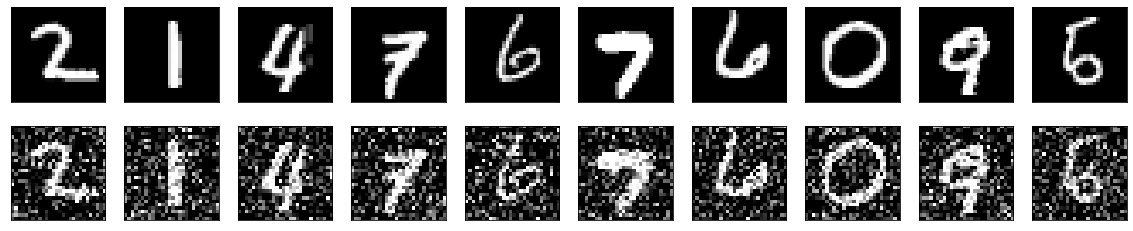

In [3]:
# Como precisamos apenas de imagens do conjunto de dados para codificar e decodificar, não usaremos os rótulos.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize e reformule os dados
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Cria uma cópia dos dados com ruído adicionado
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Exibe os dados do treinamento e uma versão deles com ruído adicional
display(train_data, noisy_train_data)

In [4]:
input = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = MaxPooling2D((2, 2), padding="same")(x)

x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)

In [5]:
# Decoder
x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = Conv2DTranspose(32, (4, 4), strides=2, activation="relu", padding="same")(x)
x = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

In [6]:
# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

In [7]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/10
469/469 [==============================] - 117s 247ms/step - loss: 0.1685 - val_loss: 0.1013
Epoch 2/10
469/469 [==============================] - 112s 239ms/step - loss: 0.0983 - val_loss: 0.0947
Epoch 3/10
469/469 [==============================] - 116s 247ms/step - loss: 0.0942 - val_loss: 0.0921
Epoch 4/10
469/469 [==============================] - 108s 229ms/step - loss: 0.0921 - val_loss: 0.0905
Epoch 5/10
469/469 [==============================] - 108s 231ms/step - loss: 0.0907 - val_loss: 0.0894
Epoch 6/10
469/469 [==============================] - 108s 230ms/step - loss: 0.0897 - val_loss: 0.0887
Epoch 7/10
469/469 [==============================] - 113s 241ms/step - loss: 0.0890 - val_loss: 0.0885
Epoch 8/10
469/469 [==============================] - 108s 231ms/step - loss: 0.0885 - val_loss: 0.0875
Epoch 9/10
469/469 [==============================] - 108s 230ms/step - loss: 0.0881 - val_loss: 0.0873
Epoch 10/10
469/469 [==============================] - 108s 230m

313/313 [==============================] - 6s 18ms/step


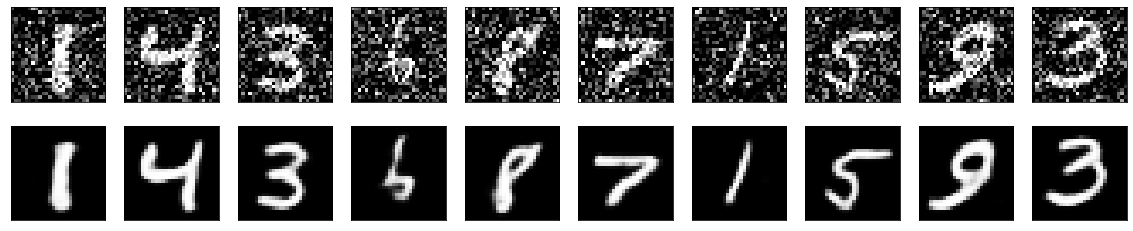

In [8]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)